In [33]:
# Khai báo thư viện
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler

#### Khởi tạo dữ liệu

In [34]:
# tạo các cột theo các phân phối khác nhau
df = pd.DataFrame({ 
    'beta': np.random.beta(5, 1, 1000) * 60,        # beta
    'exponential': np.random.exponential(10, 1000), # exponential
    'normal_p': np.random.normal(10, 2, 1000),      # normal platykurtic
    'normal_l': np.random.normal(10, 10, 1000),     # normal leptokurtic
})

In [35]:
df.head()

,beta,exponential,normal_p,normal_l
0,47.420520,0.864654,8.071816,18.173300
1,53.888930,7.587836,9.484552,13.856716
2,49.053058,34.275175,9.491317,2.555423
3,55.364745,14.399043,9.557285,15.927641
4,57.891407,0.892830,11.116942,-6.730020


In [36]:
# thêm dữ liệu được tạo theo phân phối nhị thức
first_half = np.random.normal(20, 3, 500) 
second_half = np.random.normal(-20, 3, 500) 
bimodal = np.concatenate([first_half, second_half])
df['bimodal'] = bimodal

In [37]:
# hiển thị dữ liệu
df.head()

,beta,exponential,normal_p,normal_l,bimodal
0,47.420520,0.864654,8.071816,18.173300,21.454276
1,53.888930,7.587836,9.484552,13.856716,22.168295
2,49.053058,34.275175,9.491317,2.555423,15.516668
3,55.364745,14.399043,9.557285,15.927641,18.032286
4,57.891407,0.892830,11.116942,-6.730020,22.942422


#### Trực quan hóa dữ liệu sinh ra

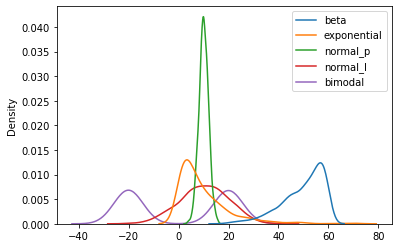

In [38]:
sns.kdeplot(data=df);

#### Hiển thị thống kê về dữ liệu sinh ra

In [39]:
df.describe()

,beta,exponential,normal_p,normal_l,bimodal
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,49.931329,9.762559,10.060946,10.249606,-0.062940
std,8.397531,10.392503,1.918861,9.722940,20.263702
min,18.513852,0.004656,3.589607,-21.099044,-27.481980
25%,45.012118,2.718647,8.837395,3.894059,-20.060846
50%,52.039197,6.478062,10.057241,10.443797,-0.499814
75%,56.773074,13.506618,11.320858,17.191565,19.929289
max,59.995935,71.379647,15.800632,40.752673,30.411531


#### Thêm một đặc trưng với giá trị lớn hơn nhiều

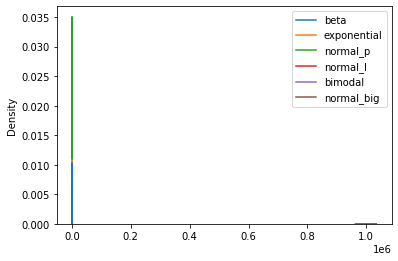

In [40]:
# Khi thêm đặc trưng này,do giá trị của chúng khác xa với khoảng giá trị ban đầu nên nếu ta biểu diễn bằng đồ thị thì các dữ liệu lúc trước sẽ co cụm lại 1 bênIn [ ]:
normal_big = np.random.normal(1000000, 10000, (1000,1))  # normal distribution of large values
df['normal_big'] = normal_big
sns.kdeplot(data=df);

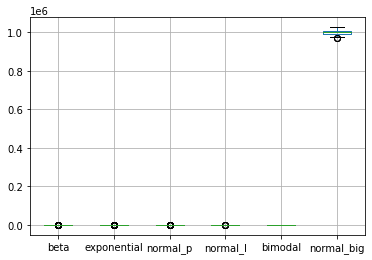

In [41]:
# trực quan hóa bằng biểu đồ box plot
df.boxplot();

#### Chuẩn hóa với StandardScaler (Z-Score scaling)

In [42]:
# Khai báo đối tượng StandardScaler
s_scaler = StandardScaler()

In [43]:
# Chuẩn hóa dữ liệu trong df với StandardScaler
df_s = s_scaler.fit_transform(df)
# lấy danh sáchc cột
col_names = list(df.columns)
# chuyển về DataFrame, gán các cột của df cho dữ liệu đã được chuẩn hóa
df_s = pd.DataFrame(df_s, columns=col_names)

In [44]:
df_s.head()

,beta,exponential,normal_p,normal_l,bimodal,normal_big
0,-0.299143,-0.856613,-1.037139,0.815356,1.062391,-0.985727
1,0.471517,-0.209364,-0.300534,0.371175,1.097645,-2.035780
2,-0.104639,2.359863,-0.297007,-0.791739,0.769228,-0.497485
3,0.647349,0.446361,-0.262611,0.584276,0.893434,-1.006592
4,0.948381,-0.853901,0.550600,-1.747221,1.135867,1.626628


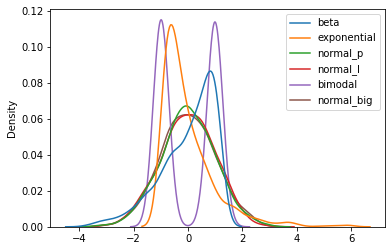

In [45]:
# biểu diễn dữ liệu đã được chuẩn hóa
sns.kdeplot(data=df_s);

In [46]:
# thống kê về dữ liệu được sinh ra
df_s.describe()

,beta,exponential,normal_p,normal_l,bimodal,normal_big
count,1.000000e+03,1.000000e+03,1.000000e+03,1.000000e+03,1.000000e+03,1.000000e+03
mean,6.981082e-16,-1.385558e-16,-2.566836e-16,-1.669775e-16,-1.136868e-16,1.050893e-14
std,1.000500e+00,1.000500e+00,1.000500e+00,1.000500e+00,1.000500e+00,1.000500e+00
min,-3.743147e+00,-9.394066e-01,-3.374178e+00,-3.225808e+00,-1.353788e+00,-2.988993e+00
25%,-5.860856e-01,-6.781270e-01,-6.379638e-01,-6.539923e-01,-9.873770e-01,-6.845639e-01
50%,2.511361e-01,-3.162030e-01,-1.931717e-03,1.998242e-02,-2.157021e-02,1.157277e-04
75%,8.151406e-01,3.604456e-01,6.569225e-01,7.143345e-01,9.870967e-01,6.751000e-01
max,1.199119e+00,5.931961e+00,2.992692e+00,3.138796e+00,1.504647e+00,2.705156e+00


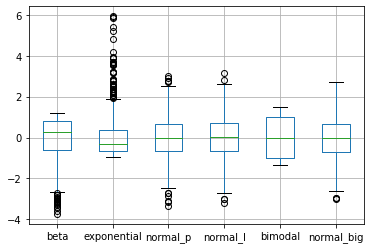

In [47]:
# trực quan hóa bằng biểu đồ box plot
df_s.boxplot();